# Code to perform linear regression using gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating input data

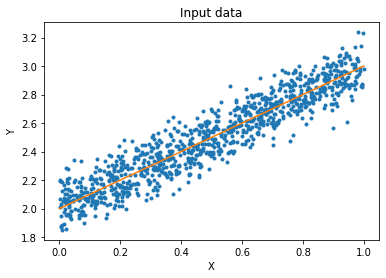

In [15]:
Slope = 1
Intercept = 2

NumberPoints = 1000
NoiseVariance = 0.1

Xmin = 0
Xmax = 1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = Slope * PointX + Intercept

PointY = PointY + NoiseVariance * np.random.randn( NumberPoints , 1  )

plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.title( 'Input data' )
plt.show()

### Perform gradient descent to find the best fit line

Let the $i$ th data point be: <br>
$\{ x_i , y_i \}$ <br>
where $i \in \{1,2,...N\}$, with $N$ data points. <br>
<br>
Our goal is to fit the line of the form $y = m x + c$ <br>
<br>
Let the initial estimate for slope and intercept be: $m_0$, $c_0$ <br>
Then the estimated $y_i$'s are <br>
$\bar{y}_i := m_0 x_i + c_0$ <br>
<br>
We define the squared error function   $E( m , c ) := \sum_{i=1}^{N} (y_i - \bar{y}_i)^2$ <br>
<br>
Now, the parameters $(m,c)$ are updated using the gradient descent algorithm as: <br>
$m \;\; \rightarrow \;\; m - \eta  \frac{\partial E}{\partial m} \;\;\; = \;\;\; m + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) x_i $ <br>
$c \;\;\; \rightarrow \;\;\; c - \eta  \frac{\partial E}{\partial c} \;\;\;\; = \;\;\;\; c + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) $ <br>
<br>
where, $\eta$ is the $Learning \; rate$.


Error =  6323.24823688063 Estimated Slope =  0.2621196083045057 Estimated Intercept 0.4993270466525129
Error =  3543.4918500507465 Estimated Slope =  0.45804179671141954 Estimated Intercept 0.8729539966783091
Error =  1987.8466127898023 Estimated Slope =  0.6044447540831692 Estimated Intercept 1.1525453322383539
Error =  1117.2541259376376 Estimated Slope =  0.7138051734423901 Estimated Intercept 1.3617888253966761
Error =  630.0396549882125 Estimated Slope =  0.7954566677136854 Estimated Intercept 1.5184049824341226
Error =  357.3761378790251 Estimated Slope =  0.8563815557769692 Estimated Intercept 1.6356502811222717
Error =  204.78242048341096 Estimated Slope =  0.9018031865688374 Estimated Intercept 1.7234417215693412
Error =  119.38375341945873 Estimated Slope =  0.9356290484790148 Estimated Intercept 1.7891980870296624
Error =  71.58969393477088 Estimated Slope =  0.9607822533067507 Estimated Intercept 1.8384692793870543
Error =  44.8404598019645 Estimated Slope =  0.979449514782

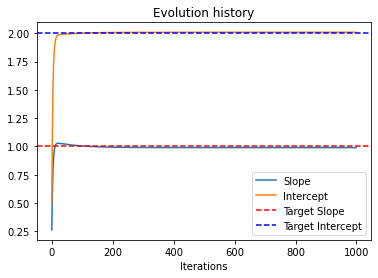

In [17]:
SlopeEstimate = 0
InterceptEstimate = 0

NumberIterations = 1000
LearningRate = 0.0001

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    PointYEstimate = SlopeEstimate * PointX + InterceptEstimate

    Error = np.sum( ( PointY - PointYEstimate )**2 )
    dError_dSlope = np.sum( -2 * ( PointY - PointYEstimate ) * PointX )
    dError_dIntercept = np.sum( -2 * ( PointY - PointYEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='b' , linestyle='--' )
plt.legend( ['Slope','Intercept','Target Slope','Target Intercept'])
plt.title( 'Evolution history' )
plt.xlabel( 'Iterations' )
plt.show()

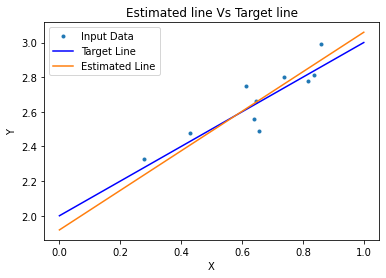

In [14]:
plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] , 'b' )
plt.plot( [Xmin,Xmax] , [SlopeEstimate*Xmin+InterceptEstimate , SlopeEstimate*Xmax+InterceptEstimate])
plt.title( 'Estimated line Vs Target line' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.legend( ['Input Data','Target Line','Estimated Line'] )
plt.show()